Problema de negócio: existe alguma relação entre a área de imóveis (metros quadrados) e o valor do aluguel em uma determinada cidade? Caso exista relação, como podemos mensurá-la?# Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Carregando os dados

In [2]:
# Carrega o dataset 
df = pd.read_csv('dataset.csv')

In [9]:
df.shape

(3000, 7)

In [10]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [8]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


# Análise exploratória

In [5]:
# Verifica se há valores ausentes
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [6]:
# Resumo estatistico do dataset
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [7]:
# Resumo estatistico da variável alvo 
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

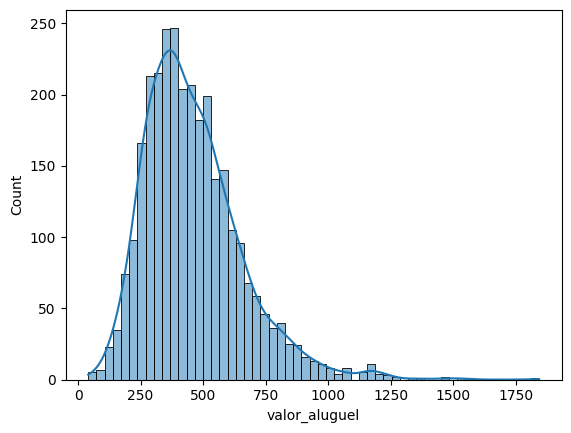

In [8]:
# Histograma da variável alvo
sns.histplot(data = df, x = 'valor_aluguel', kde = True)

In [9]:
# Correlação entre as variáveis 
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


Coeficiente de correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis numéricas. 
Um coeficiente igual a 1 indica perfeita positiva, quando uma aumenta, a outra também aumenta.
Um coeficiente igual a -1 indicia perfeita negativa, quando uma aumenta, a outra diminui.

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

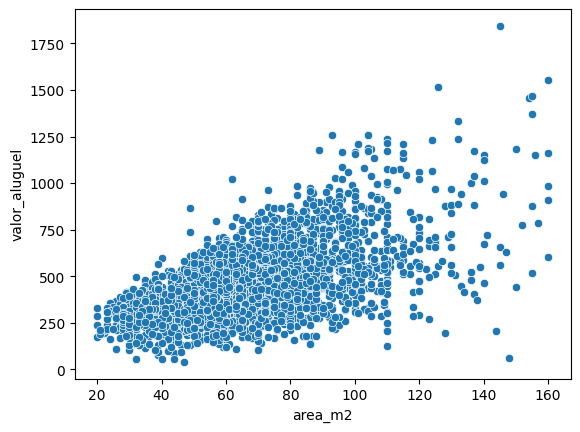

In [10]:
# Vamos analisar a relação entre a variável de entrada area_m2 e a variável alvo valor_aluguel
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')

# Regressão Lienar Simples

Técnica para modelar a relação entre uma variável dependente (alvo) e uma ou mais variáveis independentes.
Tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.
Simples: Y = a + bX + e

# Modelo OLS (método minimos quadrados ordinarios) com Statsmodels 

In [3]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [5]:
# Definimos a variável dependente
y = df['valor_aluguel']

In [6]:
# Definimos a variável independente
x = df['area_m2']

In [7]:
# O statsmodels requer a adição de uma constante á variável idependente
x = sm.add_constant(x)

In [8]:
# Criamos o modelo
modelo = sm.OLS(y, x) # Y antes do X

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [9]:
# Treinamento do modelo 
resultado = modelo.fit()

In [10]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          6.84e-275
Time:                        19:19:05   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

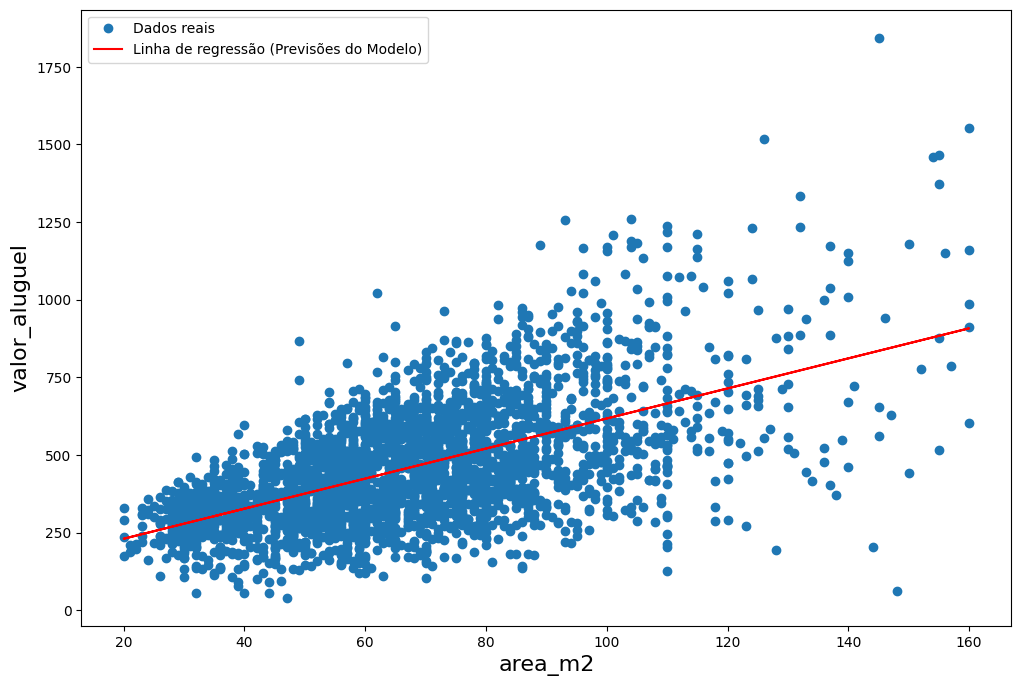

In [11]:
# Plot 
plt.figure(figsize = (12, 8))
plt.xlabel('area_m2', size = 16)
plt.ylabel('valor_aluguel', size = 16)
plt.plot(x['area_m2'], y, "o", label = "Dados reais")
plt.plot(x['area_m2'], resultado.fittedvalues, "r-", label= "Linha de regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

# Conclusão

Existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Apenas a área dos imóveis nãoé suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (R elevado a 2) de apenas 0.34
O ideal seria usar mais variáveis de entrada para construir o modelo para compreender se outros fatores influenciam no valor do aluguel.
É sempre importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido a área dos imóveis.